In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [27]:
iris = datasets.load_iris()

In [38]:
target = []
for num in iris.target:
    if num == 0:
        num = iris.target_names[0]
    elif num == 1:
        num = iris.target_names[1]
    else:
        num = iris.target_names[2]
    target.append(num) 

## Create Dataframe

In [89]:
data = {}
count = 0
for feature in iris.feature_names:
    data[feature] = [d for d in iris.data[:, count]]
    count += 1
data['target'] = target
df = pd.DataFrame(data)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Visualize initial clusters

Text(0, 0.5, 'Sepal Width')

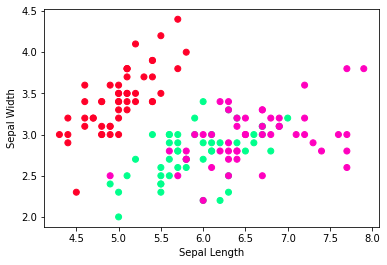

In [108]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target, cmap='gist_rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

## Build K-Means clusters

In [111]:
km = KMeans(n_clusters = 3, random_state = 21)
km.fit(df.iloc[:, [0, 1]])

KMeans(n_clusters=3, random_state=21)

## Explore K-Means clusters

In [112]:
km.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

## Compare original clusters and K-mean clusters

In [136]:
import numpy as np
# Change km.labels_ 0 to 2, 1 to 0, and 2 to 0
relabel = np.choose(km.labels_, [1,0,2]).astype(np.int64)
print("Ori Iris Label: ", iris.target)
print("Ori K-mean Label: ", new_labels)
print("Encoded K-mean Label: ", relabel)

Ori Iris Label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Ori K-mean Label:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Encoded K-mean Label:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5, 1.0, 'K-Means')

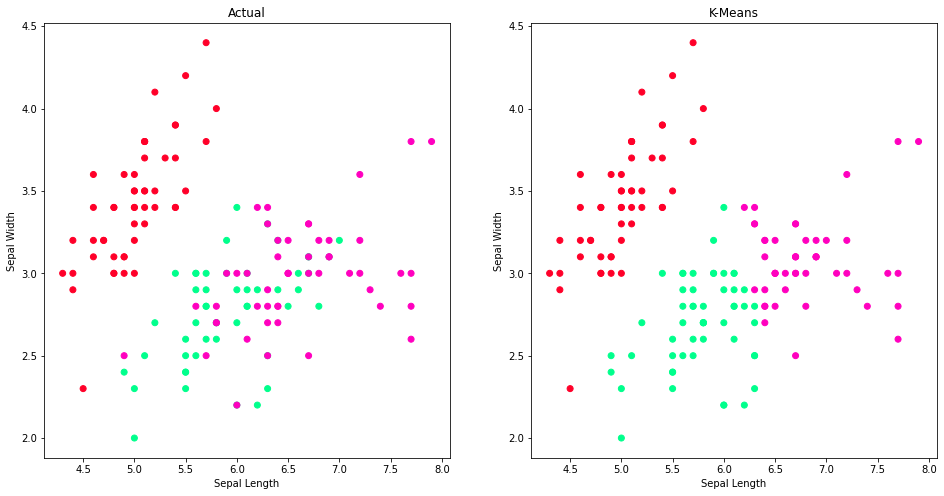

In [141]:
new_labels = km.labels_

# Plot comparison between original cluster and k-means clusters
fig, axes = plt.subplots(1, 2, figsize = (16,8))
axes[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target, cmap='gist_rainbow')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_title('Actual')
axes[1].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=relabel, cmap='gist_rainbow')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_title('K-Means')

## Build K-Means Clusters using all variables

In [95]:
km = KMeans(n_clusters = 3, random_state = 21)
km.fit(df.iloc[:, :3])

KMeans(n_clusters=3, random_state=21)

In [96]:
km.cluster_centers_

array([[5.84655172, 2.73275862, 4.3637931 ],
       [5.006     , 3.428     , 1.462     ],
       [6.83571429, 3.06428571, 5.6547619 ]])

Text(0.5, 1.0, 'K-Means')

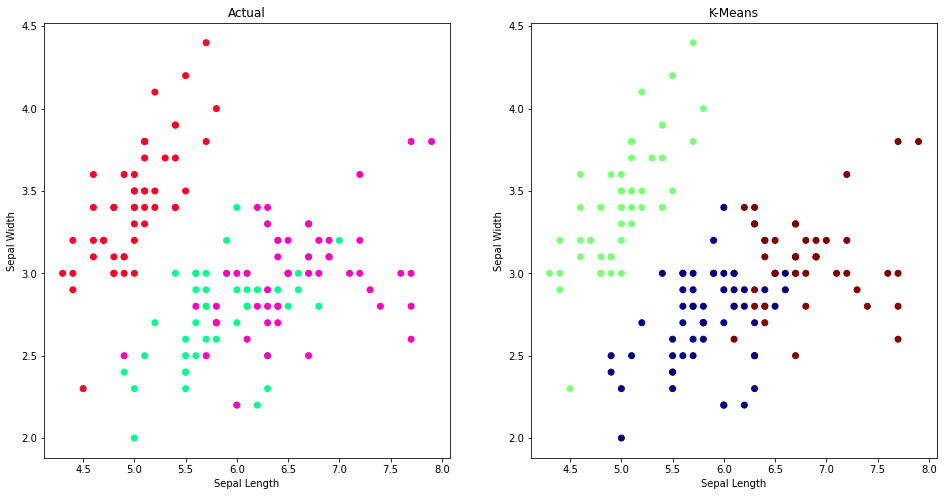

In [97]:
second_labels = km.labels_

# Plot comparison between original cluster and k-means clusters
fig, axes = plt.subplots(1, 2, figsize = (16,8))
axes[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target, cmap='gist_rainbow')
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_title('Actual')
axes[1].scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=second_labels, cmap='jet')
axes[1].set_xlabel('Sepal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_title('K-Means')